In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula .api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

# Prepare a prediction model for profit of 50_startups data.
 * Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


In [24]:
data=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 5/50_Startups.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [27]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MS',},axis=1)

In [28]:
data1

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [29]:
# remove duplicate column 
# No duplicate column
data1[data1.duplicated()]

,RDS,ADMS,MS,State,Profit


In [30]:
data1.describe()

,RDS,ADMS,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
data1.corr()

,RDS,ADMS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


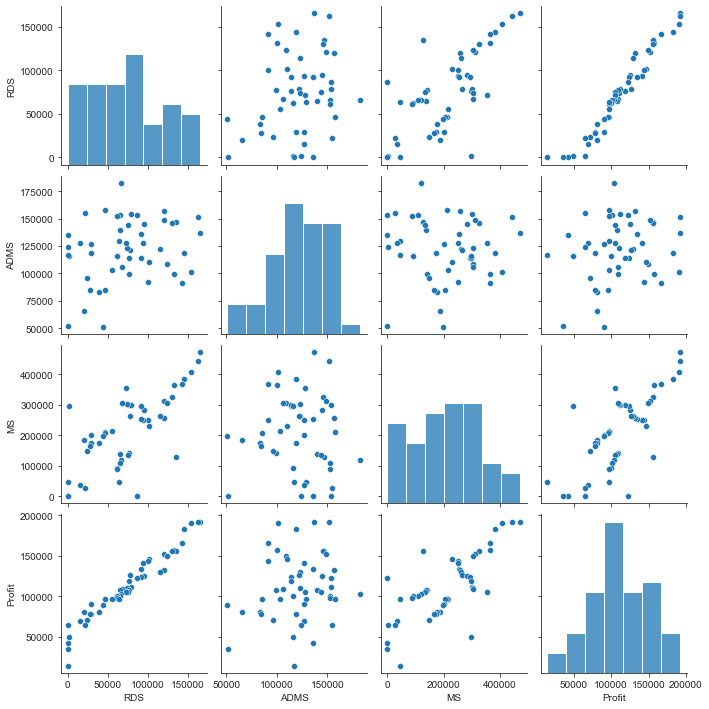

In [32]:
# fromat to plot background and scatter plot for all variables.
sns.set_style(style='ticks')
sns.pairplot(data1)

In [33]:
model=smf.ols('Profit~RDS+ADMS+MS',data=data1).fit()

In [34]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MS               0.027228
dtype: float64

In [35]:
model.tvalues,np.round(model.pvalues,4)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.0000
 RDS          0.0000
 ADMS         0.6018
 MS           0.1047
 dtype: float64)

In [36]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [15]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MS'
# Also finding  their tvalues and pvalues

In [37]:
# ADMS has in-significant pvalue
slr_a=smf.ols('Profit~ADMS',data=data1).fit()
slr_a.tvalues,np.round(slr_a.pvalues,3)

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.004
 ADMS         0.162
 dtype: float64)

In [17]:
# MS has significant pvalues
slr_m=smf.ols('Profit~MS',data=data1).fit()
slr_m.tvalues,slr_m.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [38]:
# varaibles have significant pvalues
slr_am=smf.ols('Profit~ADMS+MS',data=data1).fit()
slr_am.tvalues,slr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MS           9.727245e-11
 dtype: float64)

In [39]:
#by collinearity check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rs_r=smf.ols('RDS~ADMS+MS',data=data1).fit().rsquared
vif_r=1/(1-rs_r)
rs_a=smf.ols('ADMS~RDS+MS',data=data1).fit().rsquared
vif_a=1/(1-rs_a)
rs_m=smf.ols('MS~ADMS+RDS',data=data1).fit().rsquared
vif_m=1/(1-rs_m)

In [40]:
# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MS'],'VIF':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MS,2.326773


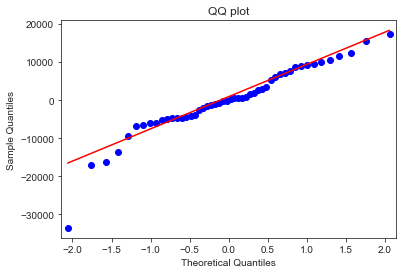

In [21]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.title('QQ plot')
plt.show()

In [22]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [23]:
# (plotting model's standardized fitted values vs standardized residual values)
# User defined z = (x - mu)/standard deviation
def standard_values(vals):return(vals-vals.mean())/vals.std()

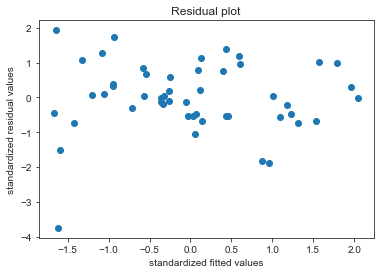

In [24]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [25]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable


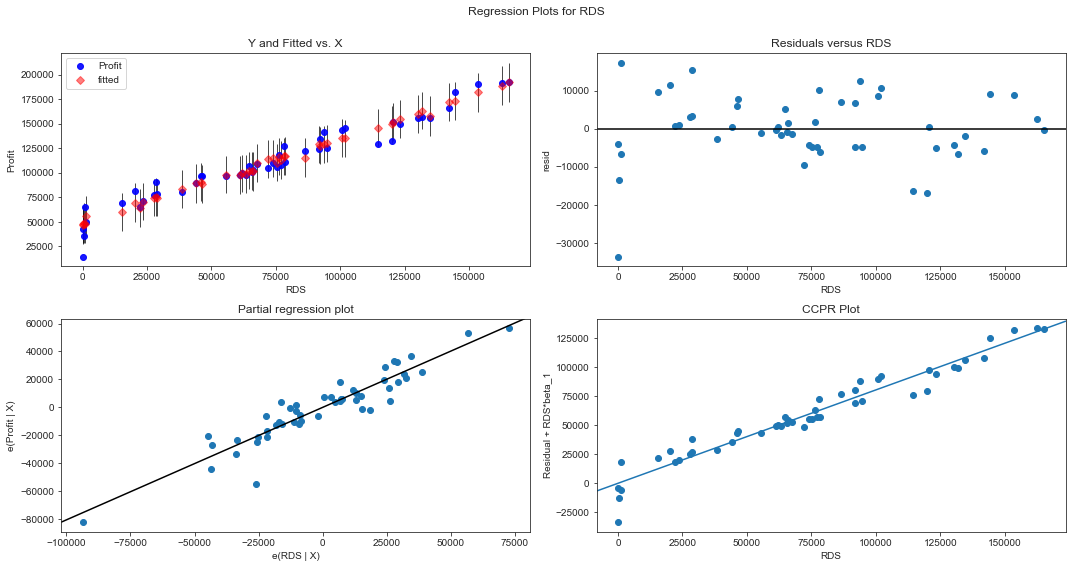

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

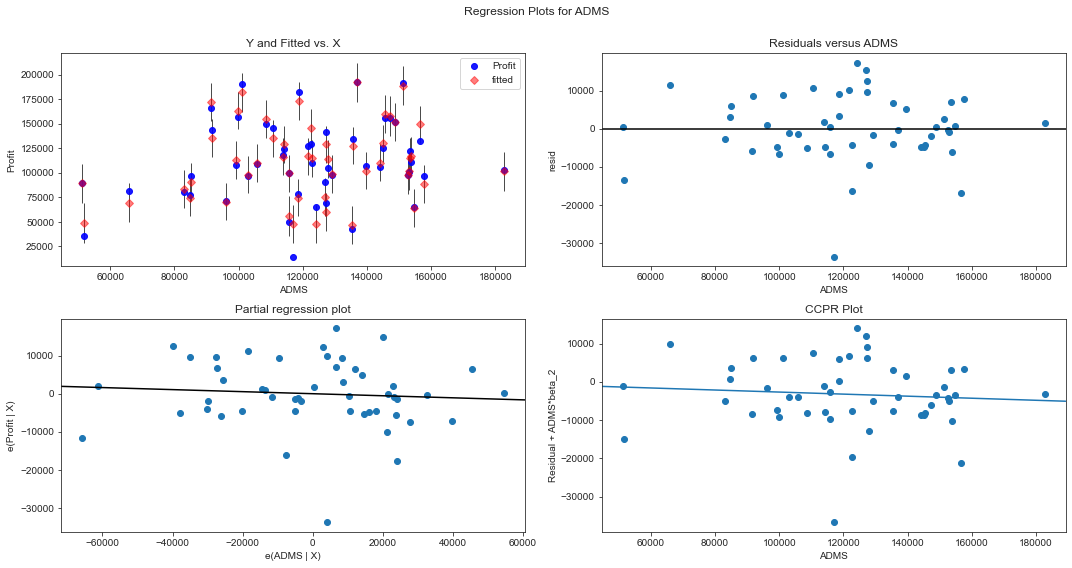

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

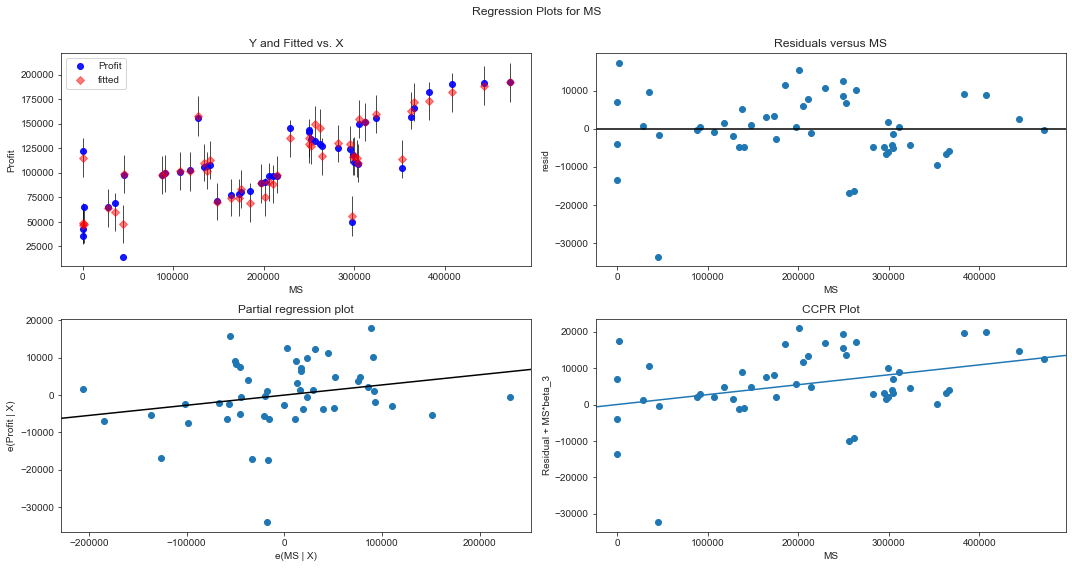

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [29]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

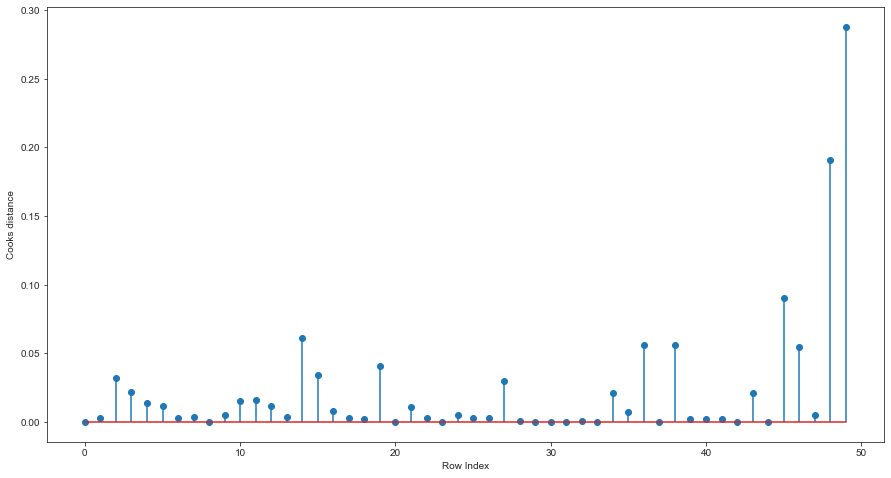

In [30]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(15,8))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')
plt.show()

In [31]:
# Index and value of influencer where C>0.5
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

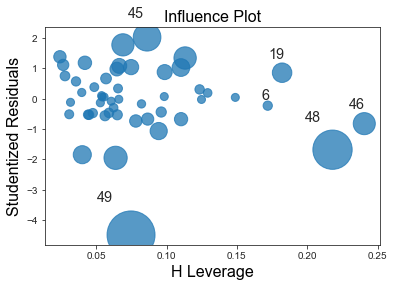

In [32]:
#Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [33]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
levrage_cutoff=3*(k+1)/n
levrage_cutoff

0.36

In [34]:
data1[data1.index.isin([49])]

,RDS,ADMS,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [35]:
# Discard the data points which are influencers and reassign the row number
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [36]:
model2=smf.ols('Profit~RDS+ADMS+MS',data=data2).fit()

In [43]:
while model2.rsquared<0.99:
    for c in[np.max(c>1)]:
        model2=smf.ols('Profit~RDS+ADMS+MS',data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c),np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_m=smf.ols('Profit~RDS+ADMS+MS',data=data2).fit()
        final_m.rsquared,final_m.aic
        print('accuracy improved',final_m.rsquared)
    
        

accuracy improved 0.9614129113440602
accuracy improved 0.962593650298269
accuracy improved 0.9638487279209413
accuracy improved 0.9663901957918793
accuracy improved 0.9706076169779906
accuracy improved 0.9727840588916423
accuracy improved 0.9734292907181952
accuracy improved 0.9785801571833451
accuracy improved 0.9777383743090915
accuracy improved 0.9790510088977512
accuracy improved 0.9790004461890552
accuracy improved 0.9807878666153609
accuracy improved 0.9838299343609735
accuracy improved 0.983114992639277
accuracy improved 0.9833768520972176
accuracy improved 0.9878892536376698
accuracy improved 0.98771919355472
accuracy improved 0.9858356627471713
accuracy improved 0.9874766829880098
accuracy improved 0.9906666289527223
accuracy improved 0.9882757054424702


In [44]:
final_m.rsquared

0.9882757054424702

In [45]:
data2

,RDS,ADMS,MS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [47]:
# new data for prediction
n_data=pd.DataFrame({'RDS':90000,'ADMS':120000,'MS':1500000},index=[0])

In [48]:
n_data

,RDS,ADMS,MS
0,90000,120000,1500000


In [50]:
# Manual Prediction of Price
final_m.predict(n_data)

0    183703.772042
dtype: float64

In [51]:
# Automatic Prediction of Price with 90.02% accurcy
pred_acc=final_m.predict(data2)

In [52]:
pred_acc

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [55]:
# creating data frame
d2={'prep_models':['Model','Final_model'],'Rsquared':[model.rsquared,final_m.rsquared]}
table=pd.DataFrame(d2)

In [56]:
table

,prep_models,Rsquared
0,Model,0.950746
1,Final_model,0.988276


*  prediction model for profit of 50_startups data is 98%

# Consider only the below columns and prepare a prediction model for    predicting Price.

 * Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 5/ToyotaCorolla.csv')

In [3]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data2=pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [42]:
data3=data2.rename({'Age_08_04':'AGE','Quarterly_Tax':'QT','cc':'CC','Doors':'DOORS','Gears':'GEARS','Price':'PRICE','Weight':'WEIGHT'},axis=1)
data3

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [43]:
data3[data3.duplicated()]

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
113,24950,8,13253,116,2000,5,5,234,1320


In [44]:
data4=data3.drop_duplicates().reset_index(drop=True)
data4.head(115)

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
112,24950,8,13253,116,2000,5,5,234,1320
113,22950,7,10000,116,2000,5,5,234,1270


In [45]:
data4.describe()

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [46]:
data4.corr()

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
PRICE,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
DOORS,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
GEARS,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WEIGHT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


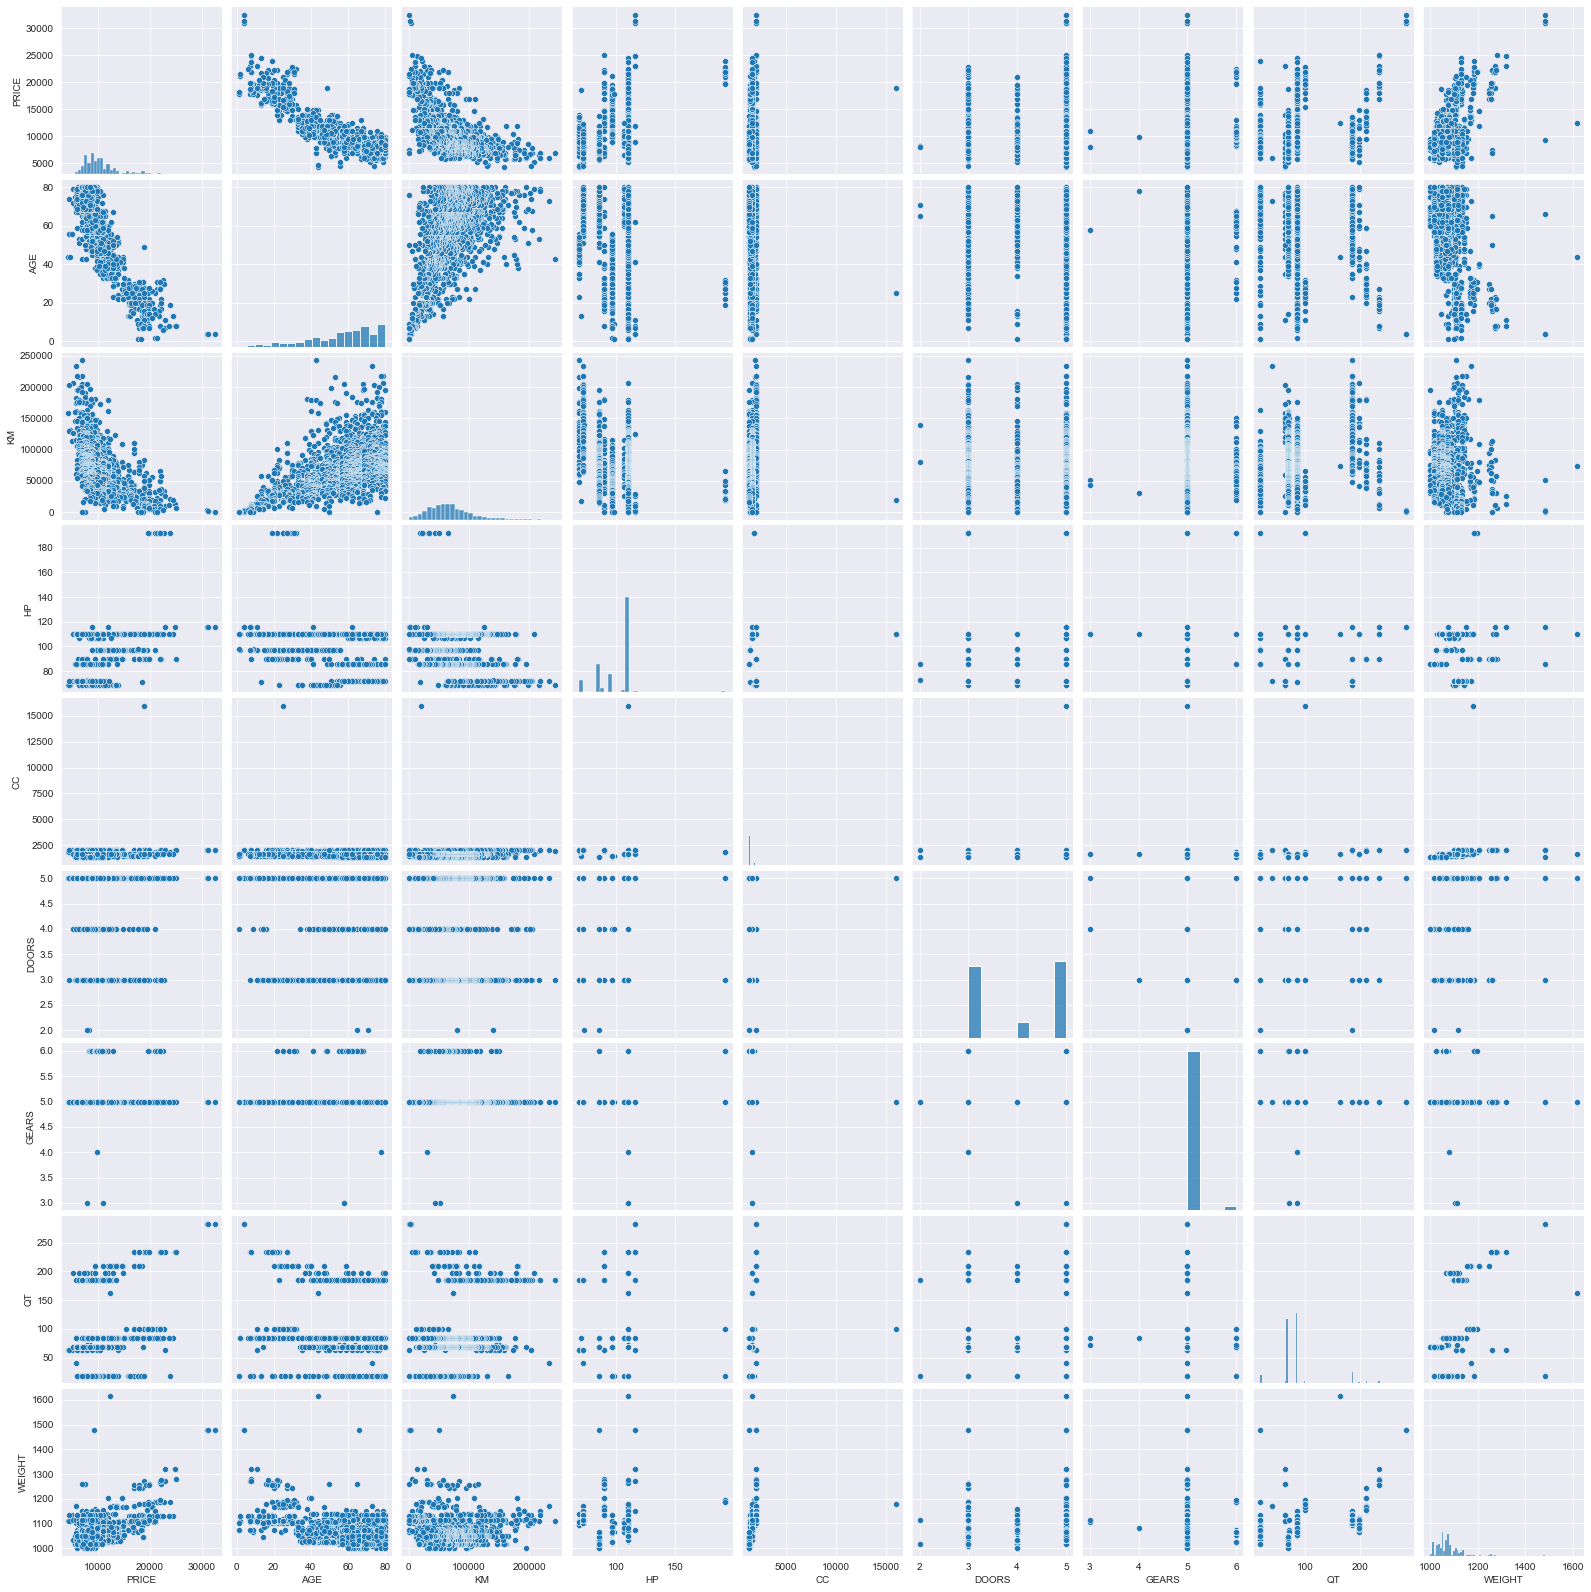

In [47]:
sns.set_style(style='darkgrid')
sns.pairplot(data4)

In [48]:
model=smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=data4).fit()

In [49]:
# finding the coefficient parameters
model.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
DOORS          -0.920189
GEARS         597.715894
QT              3.858805
WEIGHT         16.855470
dtype: float64

In [50]:
np.round(model.tvalues,4),np.round(model.pvalues,4)

(Intercept    -3.8753
 AGE         -46.5519
 KM          -16.5524
 HP           11.2097
 CC           -1.3164
 DOORS        -0.0230
 GEARS         3.0346
 QT            2.9442
 WEIGHT       15.7607
 dtype: float64,
 Intercept    0.0001
 AGE          0.0000
 KM           0.0000
 HP           0.0000
 CC           0.1882
 DOORS        0.9816
 GEARS        0.0025
 QT           0.0033
 WEIGHT       0.0000
 dtype: float64)

In [51]:
# model accuracy 
model.rsquared,model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [16]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also finding their tvalues and pvalues

In [52]:
## CC has significant pvalue
slr_c=smf.ols('PRICE~CC',data=data4).fit()
slr_c.tvalues,slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [53]:
# Doors has significant pvalue
slr_d=smf.ols('PRICE~DOORS',data=data4).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 DOORS         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 DOORS        2.404166e-12
 dtype: float64)

In [54]:
# Both has significant pvalue
mlr_cd=smf.ols('PRICE~CC+DOORS',data=data4).fit()
mlr_cd.tvalues,mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 DOORS         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 DOORS        2.109558e-11
 dtype: float64)

In [55]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_age=smf.ols('AGE~KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('KM~AGE+HP+CC+DOORS+GEARS+QT+WEIGHT',data=data4).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('HP~KM+AGE+CC+DOORS+GEARS+QT+WEIGHT',data=data4).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('CC~KM+HP+AGE+DOORS+GEARS+QT+WEIGHT',data=data4).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_d=smf.ols('DOORS~KM+HP+CC+AGE+GEARS+QT+WEIGHT',data=data4).fit().rsquared
vif_d=1/(1-rsq_d)
rsq_g=smf.ols('GEARS~KM+HP+CC+DOORS+AGE+QT+WEIGHT',data=data4).fit().rsquared
vif_g=1/(1-rsq_g)
rsq_q=smf.ols('QT~KM+HP+CC+DOORS+GEARS+AGE+WEIGHT',data=data4).fit().rsquared
vif_q=1/(1-rsq_q)
rsq_w=smf.ols('WEIGHT~KM+HP+CC+DOORS+GEARS+QT+AGE',data=data4).fit().rsquared
vif_w=1/(1-rsq_w)

In [56]:
# putting variables in dataframe
d1={'Variables':['AGE','KM','HP','CC','DOORS','GEARS','QT','WEIGHT'],
   'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_q,vif_w]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,VIF
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,DOORS,1.155890
5,GEARS,1.098843
6,QT,2.295375
7,WEIGHT,2.487180


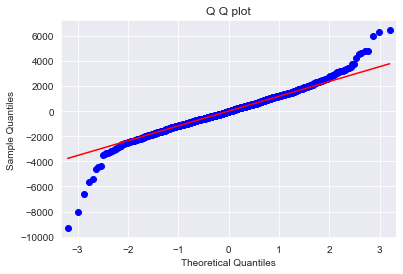

In [112]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.title('Q Q plot')
plt.show()

In [113]:
# outliar detection from above QQ plot of residuals
list(np.where(model.resid>6000))
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [117]:
# plotting model's standardized fitted values vs standardized residual values
# User defined z = (x - mu)/std
def standard_values(vals):return(vals-vals.mean())/vals.std()


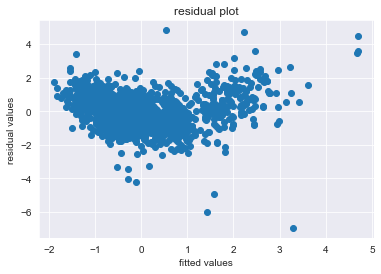

In [118]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('residual plot')
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

In [120]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

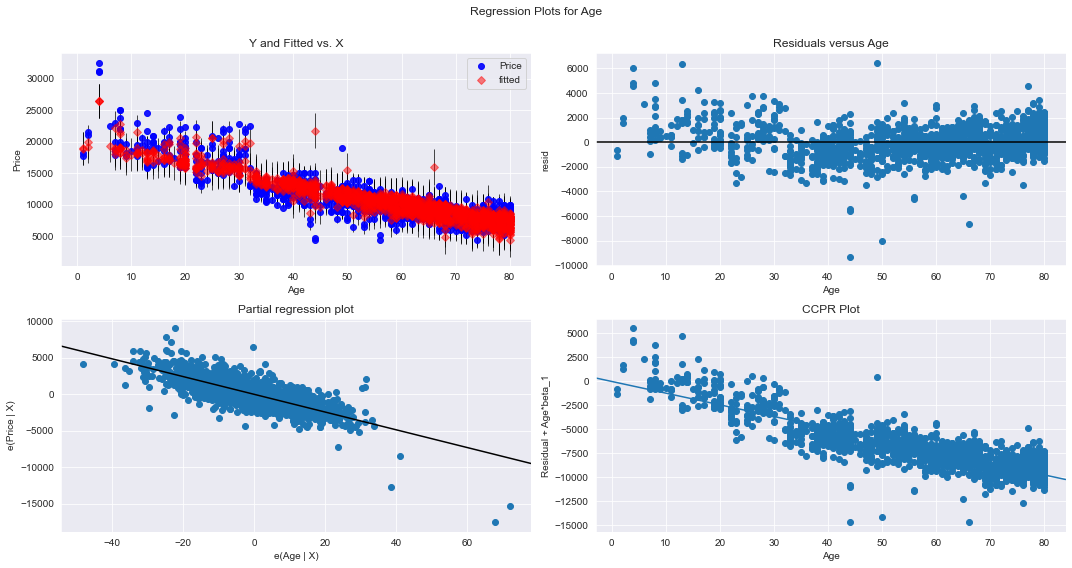

In [123]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

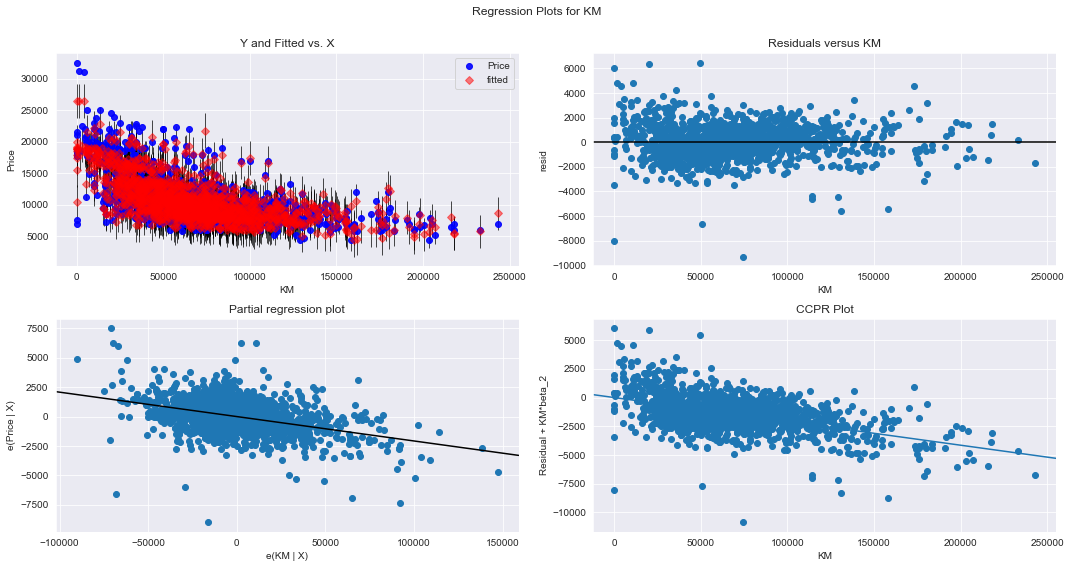

In [124]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

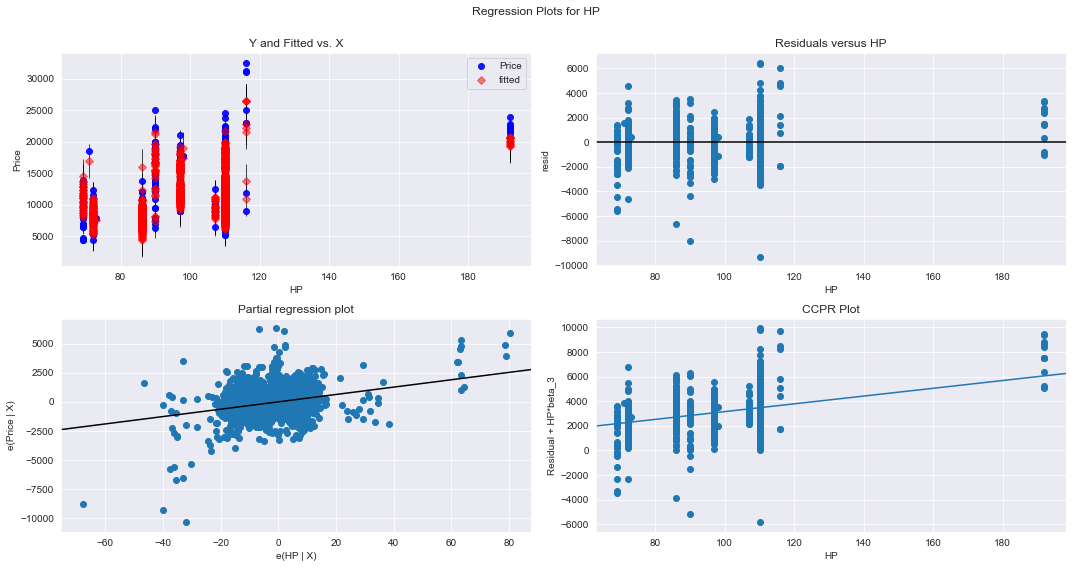

In [127]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

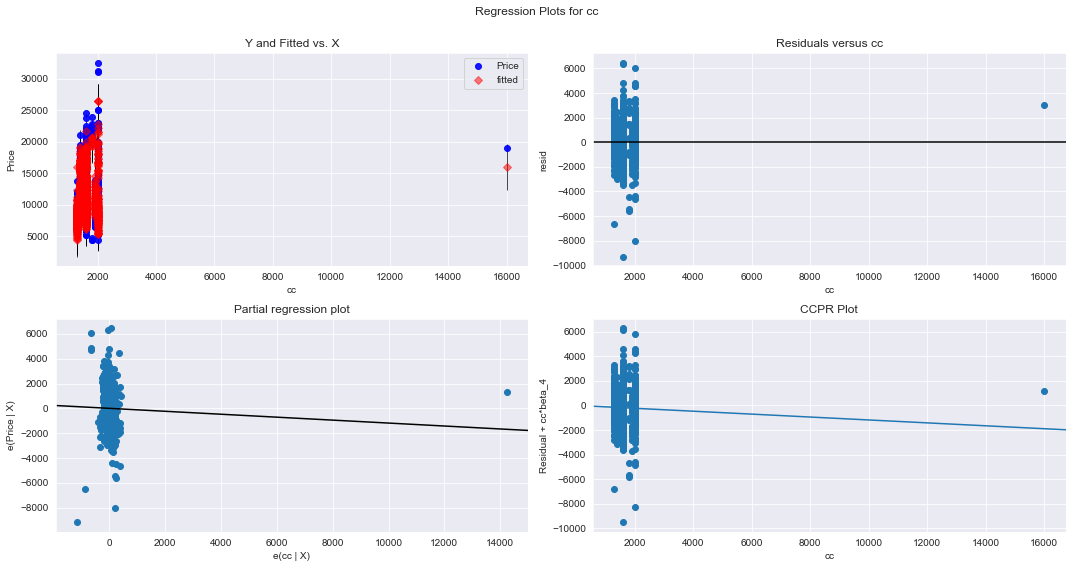

In [129]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

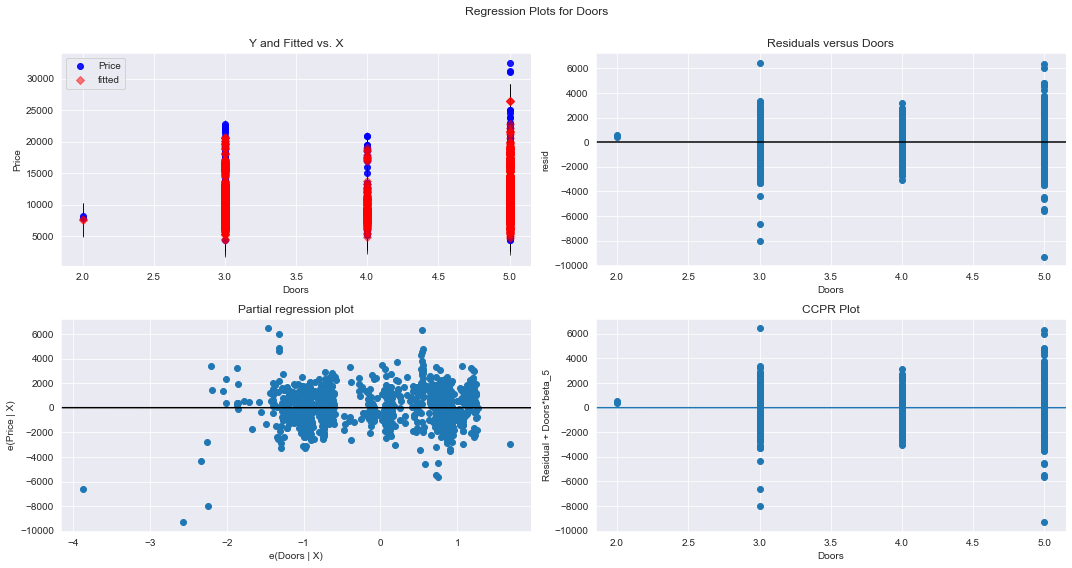

In [130]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

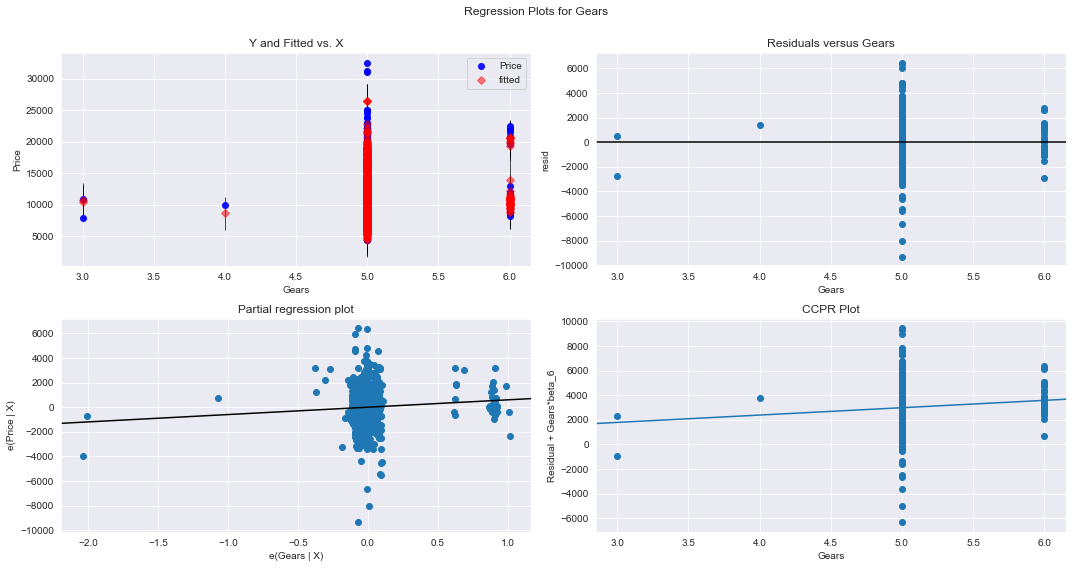

In [131]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

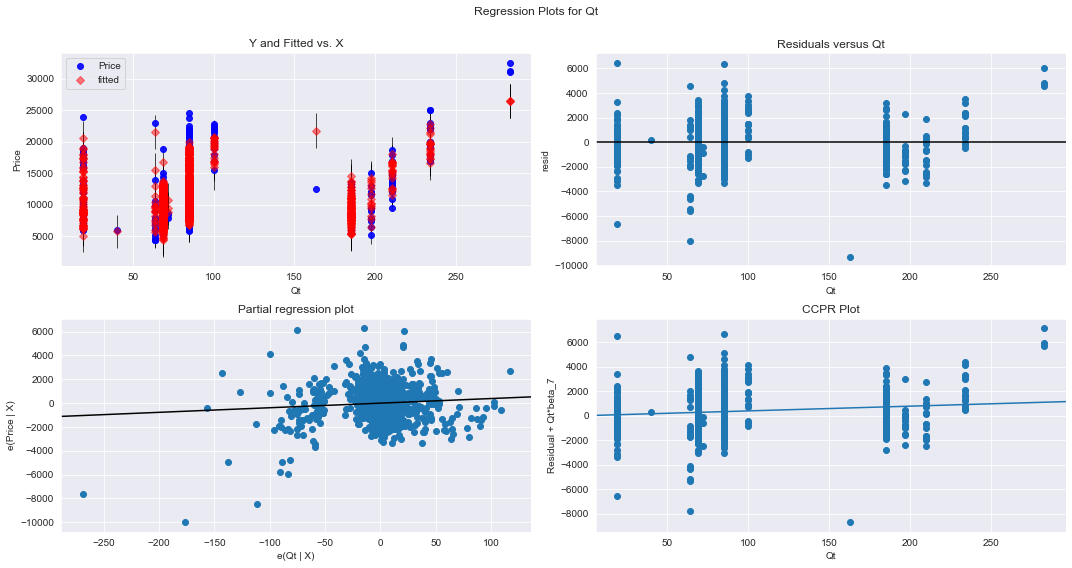

In [132]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Qt',fig=fig)
plt.show()

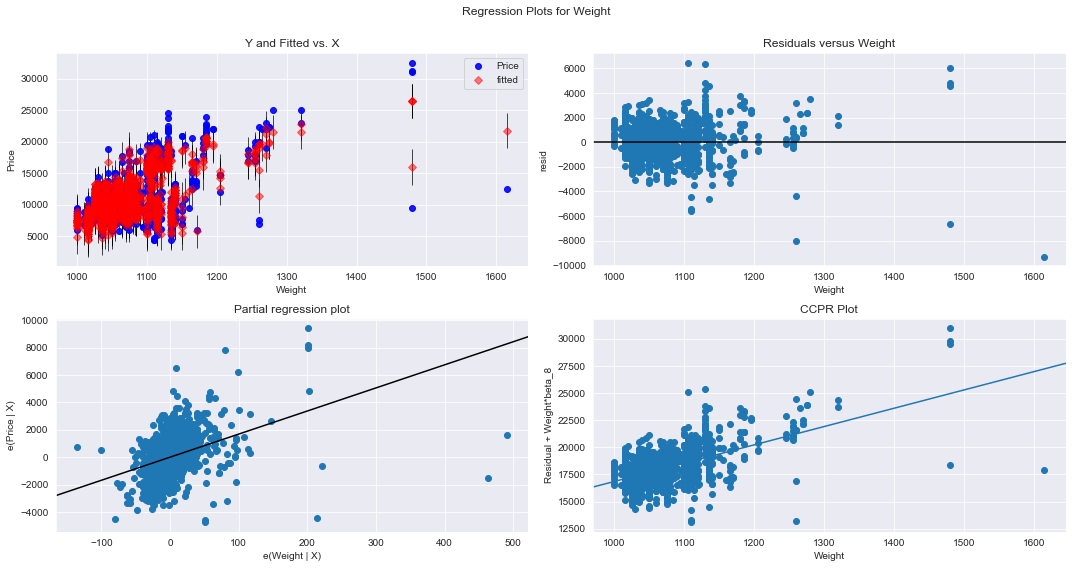

In [133]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [134]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

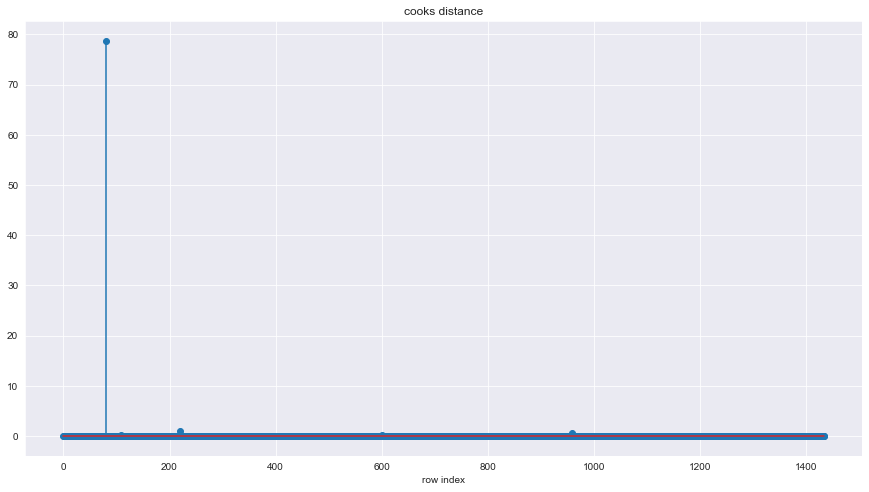

In [137]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(15,8))
plt.stem(np.arange(len(data4)),np.round(c,3))
plt.xlabel('row index')
plt.title('cooks distance')
plt.show()

In [138]:
np.argmax(c),np.max(c) # Index and value of influencer

(80, 78.72950582248232)

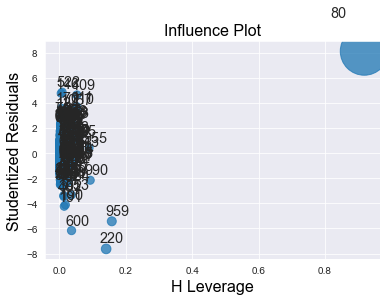

In [146]:
# Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [140]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
# above  0.020905 is outliers
k=data4.shape[1]
n=data4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [143]:
data4[data4.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Qt,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [147]:
data_new=data4.copy()
data_new

,Price,Age,KM,HP,cc,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [149]:
# Discard the data points which are influencers and reassign the row number
data5=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
data5

,Price,Age,KM,HP,cc,Doors,Gears,Qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [150]:
model2=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight',data=data5).fit()

In [156]:
while model2.rsquared<.090:
    for c in[np.max(c)>0.5]:
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(),np.max()
        data5=data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
        data5
else:
        final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qt+Weight',data=data5).fit()
        final_model.rsquared,final_model.aic
        print('model accuracy improved',final_model.rsquared)

model accuracy improved 0.8681163912634053


In [160]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':18,"KM":50000,"HP":60,"cc":1500,"Doors":4,"Gears":5,"Qt":70,"Weight":1500},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Qt,Weight
0,18,50000,60,1500,4,5,70,1500


In [161]:
# Manual Prediction of Price
final_model.predict(new_data)

0    22582.815058
dtype: float64

In [164]:
# Automatic Prediction of Price
pred_y=final_model.predict(data5)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64